# Time Series Modelling




We follow the notations of Tsay R. (2010) *Analysis of Financial Time Series*. John Wiley & Sons, Inc., Hoboken, New Jersey.

The following notebook is an adaptation of Tsay's book except the codes are written in Python


## Characteristics of Time Series

Price or returns: Campbell, Lo, and MacKinlay (1997) provided two reasons for using returns:
1. Return of an asset provide complete information and it is also scale-free.        
2. Return series have more attractive statistical properties.

# References

1.

2.


[pandas-datareader](http://pandas-datareader.readthedocs.io/en/latest/index.html)

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
sns.set()
from pandas_datareader import data, wb
import datetime

In [2]:
start = datetime.datetime(2001, 1, 1)
end = datetime.datetime(2010, 1, 1)

Let's download some data from Yahoo to play with. `^GSPC` is yahoo ticker code for S&P500

In [3]:
f = data.DataReader("^GSPC", 'yahoo', start, end)

Before we start, let's convert the data frequency to annual.

[pandas documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#up-and-downsampling)

[stackoverflow example](https://stackoverflow.com/questions/17001389/pandas-resample-documentation)

In [4]:
df = f.resample('BA').asfreq() # Resample to yearly data. Use last business day price
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-12-31,1161.020020,1161.160034,1148.040039,1148.079956,1148.079956,9.436000e+08
2002-12-31,879.390015,881.929993,869.450012,879.820007,879.820007,1.088500e+09
2003-12-31,1109.640015,1112.560059,1106.209961,1111.920044,1111.920044,1.027500e+09
2004-12-31,1213.550049,1217.329956,1211.650024,1211.920044,1211.920044,7.869000e+08
2005-12-30,1254.420044,1254.420044,1246.589966,1248.290039,1248.290039,1.443500e+09


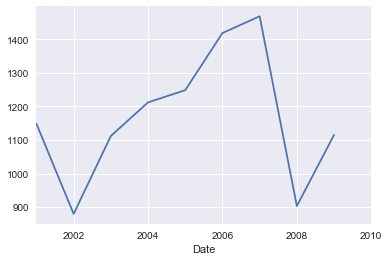

In [5]:
df['Adj Close'].plot();

# 1.0 Introduction to Time Series (Chapter 1)
- Asset returns
- Stylised facts of returns

## 1.1 Asset Returns

### One-Period Simple Return

Buy and hold an asset from one period between  $t-1$ to date $t$, 

In [6]:
df['Adj Close'].head()

Date
2001-12-31    1148.079956
2002-12-31     879.820007
2003-12-31    1111.920044
2004-12-31    1211.920044
2005-12-30    1248.290039
Freq: BA-DEC, Name: Adj Close, dtype: float64

### Simple Gross Return:

$$1 + R_t = \frac{P_t}{P_{t-1}}$$

-    $P_t$ is price of an asset at time $t$

Let's have a look at the first two observations for the next section

In [7]:
df['Adj Close'].iloc[0:2]

Date
2001-12-31    1148.079956
2002-12-31     879.820007
Freq: BA-DEC, Name: Adj Close, dtype: float64

In [8]:
print("The Simple Gross Return is {0:.4f}".
      format(df['Adj Close'].iloc[1] / df['Adj Close'].iloc[0])) # Simple Gross Return

The Simple Gross Return is 0.7663


### Simple Net Return:

$$R_t = \frac{P_t}{P_{t-1}} - 1$$

-    $R_t$ is the simple net return

In [9]:
print("The Simple Net Return is {0:.4f}".
      format(df['Adj Close'].iloc[1] / df['Adj Close'].iloc[0] -1)) # Simple Net Return

The Simple Net Return is -0.2337


### Multiperiod Simple Return

Buy and hold an asset for $k$ periods between $t-k$ to date $t$, 


Compound Return:

\begin{align}
1+R_t[k] = \frac{P_t}{P_{t-k}} & = \frac{P_t}{P_{t-1}}\times\frac{P_{t-1}}{P_{t-2}}\times...\times\frac{P_{t-k+1}}{P_{t-k}} \\ & =(1+R_t)(1+R_{t-1})...(1+R_{t-k-1}) \\ & =\prod^{k-1}_{j=0}(1+R_{t-j}) \\
\end{align}

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-12-31,1161.020020,1161.160034,1148.040039,1148.079956,1148.079956,9.436000e+08
2002-12-31,879.390015,881.929993,869.450012,879.820007,879.820007,1.088500e+09
2003-12-31,1109.640015,1112.560059,1106.209961,1111.920044,1111.920044,1.027500e+09
2004-12-31,1213.550049,1217.329956,1211.650024,1211.920044,1211.920044,7.869000e+08
2005-12-30,1254.420044,1254.420044,1246.589966,1248.290039,1248.290039,1.443500e+09


Pandas provides a neat function for us to calcuate percentage change very quickly.

Note below that we have calculated **Simple Net Return** for all our data by using `pct_change()` in pandas.

In [11]:
df['returns'] = df['Adj Close'].pct_change()
df = df[['Adj Close', 'returns']].copy()
df.head()

,Adj Close,returns
Date,,
2001-12-31,1148.079956,NaN
2002-12-31,879.820007,-0.233660
2003-12-31,1111.920044,0.263804
2004-12-31,1211.920044,0.089935
2005-12-30,1248.290039,0.030010


Let's zoom into the first couple of periods with returns data

In [12]:
df['returns'].iloc[0:4]

Date
2001-12-31         NaN
2002-12-31   -0.233660
2003-12-31    0.263804
2004-12-31    0.089935
Freq: BA-DEC, Name: returns, dtype: float64

To calculate multiperiod simple returns, 

\begin{align}
1+R_t[k] = \frac{P_t}{P_{t-k}} & = \frac{P_t}{P_{t-1}}\times\frac{P_{t-1}}{P_{t-2}}\times...\times\frac{P_{t-k+1}}{P_{t-k}} \\ & =(1+R_t)(1+R_{t-1})...(1+R_{t-k-1}) \\ & =\prod^{k-1}_{j=0}(1+R_{t-j}) \\
\end{align}

Let's calculate the first two periods

In [13]:
print("The Multiperiod Simple Returns is {0:.4f}".
      format((1 + df['returns'].iloc[1]) * (1 + df['returns'].iloc[2]))) # Multiperiod simple returns

The Multiperiod Simple Returns is 0.9685


Let's calculate the first three periods

In [14]:
print("The Multiperiod Simple Returns is {0:.4f}".
      format((1 + df['returns'].iloc[1]) * \
             (1 + df['returns'].iloc[2]) * \
             (1 + df['returns'].iloc[3]))) # Multiperiod simple returns

The Multiperiod Simple Returns is 1.0556


Of course, we are only looking at period from 2002-12-31 until 2003-01-03. What if we want to calculate for the whole period, how do we do that?

Again pandas library has nicely provided a function called `cumprod()` which stands for cummulative product, which is this part of the equation:

$$(1+R_t)(1+R_{t-1})...(1+R_{t-k-1})$$

In [15]:
df['compound returns'] = (df.returns + 1).cumprod()
df.head()

,Adj Close,returns,compound returns
Date,,,
2001-12-31,1148.079956,NaN,NaN
2002-12-31,879.820007,-0.233660,0.766340
2003-12-31,1111.920044,0.263804,0.968504
2004-12-31,1211.920044,0.089935,1.055606
2005-12-30,1248.290039,0.030010,1.087285


Note the **Compound Returns** column.

### Simple net return:

\begin{equation*}
R_t[k]=\frac{P_t-P_{t-k}}{P_{t-k}}
\end{equation*}

In [16]:
print("The Multiperiod Simple Net Returns is {0:.4f}".
      format((1 + df['returns'].iloc[1]) * (1 + df['returns'].iloc[2]) - 1)) # Multiperiod simple returns

The Multiperiod Simple Net Returns is -0.0315


In [17]:
print("The Multiperiod Simple Returns is {0:.4f}".
      format((1 + df['returns'].iloc[1]) * \
             (1 + df['returns'].iloc[2]) * \
             (1 + df['returns'].iloc[3]) - 1)) # Multiperiod simple returns

The Multiperiod Simple Returns is 0.0556


In [18]:
df['simple net returns'] = (df.returns + 1).cumprod() - 1
df.head()

,Adj Close,returns,compound returns,simple net returns
Date,,,,
2001-12-31,1148.079956,NaN,NaN,NaN
2002-12-31,879.820007,-0.233660,0.766340,-0.233660
2003-12-31,1111.920044,0.263804,0.968504,-0.031496
2004-12-31,1211.920044,0.089935,1.055606,0.055606
2005-12-30,1248.290039,0.030010,1.087285,0.087285


How then is returns different from simple net returns?

Returns is single period. From 2001-12-31 to 2002-12-31 for example.

Multiple Simple Net Returns involves multiple-periods. Here are some examples:

In [19]:
print("The Multiperiod Simple Returns from 2001-12-31 to 2002-12-31 is {0:.4f}".
      format(df['simple net returns'].iloc[1]))

The Multiperiod Simple Returns from 2001-12-31 to 2002-12-31 is -0.2337


In [20]:
print("The Multiperiod Simple Returns from 2002-12-31 to 2003-12-31 is {0:.4f}".
      format(df['simple net returns'].iloc[2]))

The Multiperiod Simple Returns from 2002-12-31 to 2003-12-31 is -0.0315


In [21]:
print("The Multiperiod Simple Returns from 2002-12-31 to 2004-12-31 is {0:.4f}".
      format(df['simple net returns'].iloc[3]))

The Multiperiod Simple Returns from 2002-12-31 to 2004-12-31 is 0.0556


###  Annualised Average Return 

Assume the asset was held for $k$ years, 

**the annualised (average) return** is:


\begin{align}
Annualised\{R_t[k]\} & =\Bigg[\prod^{k-1}_{j=0}(1+R_{t-j})\Bigg]^{\frac{1}{k}}-1  \\ & = exp\Bigg[{\frac{1}{k}}\sum^{k-1}_{j=0}ln(1+R_{t-j})\Bigg]-1 
\end{align}

NB: $exp$ is exponential function

We will show both ways below. 

In [22]:
df.head()

,Adj Close,returns,compound returns,simple net returns
Date,,,,
2001-12-31,1148.079956,NaN,NaN,NaN
2002-12-31,879.820007,-0.233660,0.766340,-0.233660
2003-12-31,1111.920044,0.263804,0.968504,-0.031496
2004-12-31,1211.920044,0.089935,1.055606,0.055606
2005-12-30,1248.290039,0.030010,1.087285,0.087285


**Method 1: Multiplicative**

\begin{align}
Annualised\{R_t[k]\} & =\Bigg[\prod^{k-1}_{j=0}(1+R_{t-j})\Bigg]^{\frac{1}{k}}-1  \\
\end{align}

In [23]:
print("The Annualised Average Returns from 2001-12-31 to 2005-12-31 (5 years) is {0:.4f}".
      format(df['compound returns'].iloc[4] ** (1/5) - 1))

The Annualised Average Returns from 2001-12-31 to 2005-12-31 (5 years) is 0.0169


**Method 2: Using Log**

\begin{align}
Annualised\{R_t[k]\} & = exp\Bigg[{\frac{1}{k}}\sum^{k-1}_{j=0}ln(1+R_{t-j})\Bigg]-1 
\end{align}

NB: $exp$ is exponential function

In [24]:
df['log returns'] = np.log(df['returns'] + 1 )
df.head()

,Adj Close,returns,compound returns,simple net returns,log returns
Date,,,,,
2001-12-31,1148.079956,NaN,NaN,NaN,NaN
2002-12-31,879.820007,-0.233660,0.766340,-0.233660,-0.266129
2003-12-31,1111.920044,0.263804,0.968504,-0.031496,0.234126
2004-12-31,1211.920044,0.089935,1.055606,0.055606,0.086118
2005-12-30,1248.290039,0.030010,1.087285,0.087285,0.029569


In [25]:
df['log_rtns_cumsum'] = df['log returns'].cumsum()
df.head()

,Adj Close,returns,compound returns,simple net returns,log returns,log_rtns_cumsum
Date,,,,,,
2001-12-31,1148.079956,NaN,NaN,NaN,NaN,NaN
2002-12-31,879.820007,-0.233660,0.766340,-0.233660,-0.266129,-0.266129
2003-12-31,1111.920044,0.263804,0.968504,-0.031496,0.234126,-0.032003
2004-12-31,1211.920044,0.089935,1.055606,0.055606,0.086118,0.054115
2005-12-30,1248.290039,0.030010,1.087285,0.087285,0.029569,0.083684


In [26]:
print("The Annualised Average Returns from 2001-12-31 to 2005-12-31 (5 years) is {0:.4f}".
      format(np.exp(df['log_rtns_cumsum'].iloc[4] / 5) - 1))

The Annualised Average Returns from 2001-12-31 to 2005-12-31 (5 years) is 0.0169


### Continuous Compounding
The net asset value $A$ of continuous compounding is:
\begin{equation*}
A = Ce^{rn}
\end{equation*}

-    $C$ is the initial capital

-    $r$ is the interest rate per annum

-    $n$ is the number of years

-    $e$ is exponential function


Recall earlier we calculate the annualised average returns

In [27]:
print("The Annualised Average Returns from 2001-12-31 to 2005-12-31 (5 years) is {0:.4f}".
      format(df['compound returns'].iloc[4] ** (1/5) - 1))

The Annualised Average Returns from 2001-12-31 to 2005-12-31 (5 years) is 0.0169


Let's store that

In [28]:
aar = df['compound returns'].iloc[4] ** (1/5) - 1

In [29]:
print("The Annually Compounded Returns is {0:.6f}".
      format((1 + aar) ** 5 - 1))

The Annually Compounded Returns is 0.087285


In [30]:
ccr = 1 * np.exp(aar * 5) - 1
print("The Continuously Compounded Returns is {0:.6f}".
      format(1 * np.exp(aar * 5) - 1))

The Continuously Compounded Returns is 0.088051


### Present Value
\begin{equation*}
C = Ae^{-rn}
\end{equation*}

-    $C$ is the initial capital

-    $r$ is the interest rate per annum

-    $n$ is the number of years

What if we are given the number of periods, end price and returns, how do we calculate the Present Value?

In [31]:
print("The Annualised Average Returns from 2001-12-31 to 2005-12-31 (5 years) is {0:.4f}".
      format(aar))

The Annualised Average Returns from 2001-12-31 to 2005-12-31 (5 years) is 0.0169


In [32]:
n = 5 # number of periods

In [33]:
print("The Present Value is {0:.6f}".
      format(df['compound returns'].iloc[4] * np.exp(- aar * n)))

The Present Value is 0.999296


### Continuously Compounded Return

Recall **Simple Gross Return**:

$$1 + R_t = \frac{P_t}{P_{t-1}}$$

-    $P_t$ is price of an asset at time $t$


The natural log of simple gross return is called **continuously compounded return**:

\begin{align}
r_t &= ln(1+R_t) \\ &= ln\frac{P_t}{P_{t-1}} \\ &= p_t-p_{t-1}
\end{align}

- $r_t$ is the continuously compounded return or log return

- $p_t = ln(P_t)$

- $R_t$ is the simple net return

Advantages of log return:

1. Continuously compounded multiperiod return is the sum of continuously compounded one-period return

2. Statistical log returns are more tractable


In [34]:
df.head()

,Adj Close,returns,compound returns,simple net returns,log returns,log_rtns_cumsum
Date,,,,,,
2001-12-31,1148.079956,NaN,NaN,NaN,NaN,NaN
2002-12-31,879.820007,-0.233660,0.766340,-0.233660,-0.266129,-0.266129
2003-12-31,1111.920044,0.263804,0.968504,-0.031496,0.234126,-0.032003
2004-12-31,1211.920044,0.089935,1.055606,0.055606,0.086118,0.054115
2005-12-30,1248.290039,0.030010,1.087285,0.087285,0.029569,0.083684


In [35]:
sgr = df['Adj Close'].iloc[1] / df['Adj Close'].iloc[0]
print("Simple Gross Return = {0:.6f}".
      format(df['Adj Close'].iloc[1] / df['Adj Close'].iloc[0])) # Simple Gross Return

Simple Gross Return = 0.766340


In [36]:
sgr

0.76634036018306728

In [37]:
print("Continuously Compounded Return = {0:.6f}".
      format(np.log(sgr))) # Continuously Compounded Return

Continuously Compounded Return = -0.266129


In [38]:
print("Continuously Compounded Return = {0:.6f}".
      format(np.log(df['Adj Close'].iloc[1] / df['Adj Close'].iloc[0]))) # Continuously Compounded Return

Continuously Compounded Return = -0.266129


In [39]:
print("Continuously Compounded Return = {0:.6f}".
      format(np.log(df['Adj Close'].iloc[1]) - np.log(df['Adj Close'].iloc[0]))) # Continuously Compounded Return

Continuously Compounded Return = -0.266129


### Portfolio Return

Simple net return of $N$ asset in portfolio $p$

\begin{align}
R_{p,t}=\sum^N_{i=1}w_iR_{it}
\end{align}

-    $w_t$ is capital allocation of asset $i$ in the portfolio

-    $R_{it}$ is the return of asset $i$ at time $t$

In [40]:
symbols_list = ['ORCL', 'TSLA', 'IBM', 'YELP', 'MSFT']

In [42]:
d = {}
for ticker in symbols_list:
    d[ticker] = data.DataReader(ticker, "yahoo", '2014-12-01')
pan = pd.Panel(d)
df1 = pan.minor_xs('Adj Close')

In [43]:
df1.head()

,IBM,MSFT,ORCL,TSLA,YELP
Date,,,,,
2014-12-01,145.063065,45.061207,40.221016,231.639999,55.130001
2014-12-02,146.077820,44.912918,40.316593,231.429993,55.169998
2014-12-03,147.739166,44.560738,40.201897,229.300003,54.770000
2014-12-04,147.317078,45.265102,40.039402,228.279999,55.139999
2014-12-05,146.616638,44.875847,40.077637,223.710007,53.840000


Convert to percentage returns

In [44]:
df2 = df1.pct_change()
df2.head()

,IBM,MSFT,ORCL,TSLA,YELP
Date,,,,,
2014-12-01,NaN,NaN,NaN,NaN,NaN
2014-12-02,0.006995,-0.003291,0.002376,-0.000907,0.000726
2014-12-03,0.011373,-0.007841,-0.002845,-0.009204,-0.007250
2014-12-04,-0.002857,0.015807,-0.004042,-0.004448,0.006756
2014-12-05,-0.004755,-0.008599,0.000955,-0.020019,-0.023576


Let's assumed we have an **equally weighted** portfolio.

First of all, let's take a look at the returns for a specific date

In [45]:
idx = 1
print("The date is {0:%d-%m-%Y}".format(df2.iloc[idx].name))

The date is 02-12-2014


In [46]:
df2.iloc[idx][0:5]

IBM     0.006995
MSFT   -0.003291
ORCL    0.002376
TSLA   -0.000907
YELP    0.000726
Name: 2014-12-02 00:00:00, dtype: float64

In [47]:
print("The portfolio average returns is {0:.6f}".format(df2.iloc[idx][0:5].mean()))

The portfolio average returns is 0.001180


Let's calculate for everyday

In [48]:
df2['portfolio_rtns'] = df2.mean(axis=1)
df2.head()

,IBM,MSFT,ORCL,TSLA,YELP,portfolio_rtns
Date,,,,,,
2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-02,0.006995,-0.003291,0.002376,-0.000907,0.000726,0.001180
2014-12-03,0.011373,-0.007841,-0.002845,-0.009204,-0.007250,-0.003153
2014-12-04,-0.002857,0.015807,-0.004042,-0.004448,0.006756,0.002243
2014-12-05,-0.004755,-0.008599,0.000955,-0.020019,-0.023576,-0.011199


What is we have a different portfolio construction?

[Floating Point Arithmetic: Issues and Limitations](https://docs.python.org/3.6/tutorial/floatingpoint.html)

[Floating point arithmetic issues in Python 3](https://www.ploggingdev.com/2016/11/floating-point-arithmetic-issues-in-python-3/)

[decimal — Fixed and Floating Point Math](https://pymotw.com/3/decimal/)

In [49]:
w = [0.10, 0.20, 0.30, 0.20, 0.20]

In [50]:
print("Portfolio combined weight {0:.4f}".format(np.sum(w)))

Portfolio combined weight 1.0000


In [51]:
df3 = df2.iloc[:, 0:5]
df3.head()

,IBM,MSFT,ORCL,TSLA,YELP
Date,,,,,
2014-12-01,NaN,NaN,NaN,NaN,NaN
2014-12-02,0.006995,-0.003291,0.002376,-0.000907,0.000726
2014-12-03,0.011373,-0.007841,-0.002845,-0.009204,-0.007250
2014-12-04,-0.002857,0.015807,-0.004042,-0.004448,0.006756
2014-12-05,-0.004755,-0.008599,0.000955,-0.020019,-0.023576


In [52]:
df3.shape

(758, 5)

In [53]:
df3.iloc[idx][0:5]

IBM     0.006995
MSFT   -0.003291
ORCL    0.002376
TSLA   -0.000907
YELP    0.000726
Name: 2014-12-02 00:00:00, dtype: float64

We can make use of matrix multiplication. Pandas has the built in function called `dot` for this exact purpose 

In [54]:
print("The portfolio average returns is {0:.6f}".format(df2.iloc[idx][0:5].dot(w)))

The portfolio average returns is 0.000718


In [55]:
df3['portfolio_rtns'] = df3.dot(w)
df3.head()

,IBM,MSFT,ORCL,TSLA,YELP,portfolio_rtns
Date,,,,,,
2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-02,0.006995,-0.003291,0.002376,-0.000907,0.000726,0.000718
2014-12-03,0.011373,-0.007841,-0.002845,-0.009204,-0.007250,-0.004575
2014-12-04,-0.002857,0.015807,-0.004042,-0.004448,0.006756,0.002125
2014-12-05,-0.004755,-0.008599,0.000955,-0.020019,-0.023576,-0.010628


### Dividend Payment

Simple net return at time t:
\begin{align}
R_{t} &=\frac{P_t+D_t}{P_{t-1}}-1 
\end{align}

Continuously compounded return at time t:
\begin{align}
r_t & = ln(P_t+D_t)-ln(P_{t-1})
\end{align}





### Excess Return

Simple excess return:
\begin{align}
Z_t=R_t-R_{0t}
\end{align}

Log excess return:
\begin{align}
z_t=r_t-r_{0t}
\end{align}

**Excess return**: the payoff on an arbitrage portfolio that goes long in an asset and short in the reference asset with no net initial investment.


***

## 1.2 Distribution Properties of Asset Returns

The objective is to understand the behaviour of the returns across assets and over time.

Consider a collection of $N$ assets held for $T$ time periods, say, $t=1, ..., T$. For each asset $i$, let $r_{it}$ be its log return at time $t$.

The **log returns** under study are:
\begin{align}
\{r_{it}: i=1, ..., N; t=1, ...,T\}
\end{align}

One can also consider the **simple returns**:
\begin{align}
\{R_{it}: i=1, ..., N; t=1, ...,T\}
\end{align}

And the **log excess returns**:
\begin{align}
\{z_{it}: i=1, ..., N; t=1, ...,T\}
\end{align}




### [Random Variable](https://en.wikipedia.org/wiki/Random_variable)

The definition of random variable, accoring to Wikipedia is:

In probability and statistics, a **random variable**, random quantity, or stochastic variable is a **variable** quantity whose possible values depend, in **random** manner, on a set of **random outcomes** events.

A univariate distribution of a random variable $X$ describes the probability of different values. 

If $f(x)$ is the probability density function (PDF), then the probability that $X$ is between $A$ and $B$ is calculated by:

\begin{align}
Pr(A<=X<B)=\int^B_Af(x)dx
\end{align}

The cumulative distribution function (CDF) for the random variable is:

\begin{align}
F(x)=Pr(X<x)=\int^x_{-\infty}f(u)du
\end{align}


Not covered:

- Joint distribution
- Marginal distribution
- Conditional distribution

### Moments

#### The $\ell$-th moment:
The $\ell$-th moment of a continuous random variable $X$ is defined as:

\begin{align}
m^{'}_{\ell}=E(X^{\ell})=\int^{\infty}_{-\infty}x^{\ell}f(x)dx
\end{align}

-    $E$ stands for expectation

-    $f(x)$ is the probability density function of $X$

#### First Moment: Mean
The first moment is called the *mean* or *expectation* of $X$. It measures the central location of the distribution. We normally denote the mean of $X$ by $\mu_x$.

\begin{align}
E(x) = \mu_x
\end{align}

#### Second Central Moment: Variance
The second central moment, denoted by $\sigma^2_x$ is called the *variance* of $X$ and it measures the variability of $X$. We obtain *standard deviation*, $\sigma_x$, of $X$ by taking square root of the variance.

The first two moments - mean and variance - of a random variable are sufficient to describe a normal distribution. For other distributions, you would need to utilise higher moments.

\begin{align}
Var(X) = \sigma^2_X=E(X-\mu_X)^2
\end{align}

#### The $\ell$-th central moment:
The $\ell$-th central moment of a continuous random variable $X$ is defined as:

\begin{align}
m^{'}_{\ell}=E(X-\mu_X)^{\ell}=\int^{\infty}_{-\infty}(x-\mu_X)^{\ell}f(x)dx
\end{align}

#### Third Central Moment:
Measures the symmetry of random variable $X$ with respect to its mean. **Skewness**, which is normalised third central moments, is frequently used in statistics. Skewness:

\begin{align}
S(x)=E\bigg[\frac{(x-\mu_x)^3}{\sigma^3_x}\bigg]
\end{align}

#### Forth Central Moment:
Measures the tail behaviour of $X$. **Kurtosis** is normalised forth central moment. Kurtosis:

\begin{align}
K(x)=E\bigg[\frac{(x-\mu_x)^4}{\sigma^4_x}\bigg]
\end{align}

#### Excess Kurtosis
Excess Kurtosis, $K(x)-3$, is frequently used to measure the peakedness of a distribution. 3 is used because the kurtosis of a normal distribution is 3. 

A distribution with a positive excess kurtosis, *leptokurtic*, is said to have heavy tails, i.e., more mass on the tails than a normal distribution. In practice, it implies greater occurences of extreme values from such distribution.

A distribution with negative excess kurtosis, *platykurtic*, has short tail.


### Sample Moments

Let ${x_1, x_2, ..., x_T}$ be a random sample of $X$ with $T$ observations.

#### Sample Mean:

\begin{align}
\hat\mu_x=\frac{1}{T}\sum^T_{t=1}x_t
\end{align}

#### Sample Variance:

\begin{align}
\hat\sigma^2_x=\frac{1}{T-1}\sum^T_{t=1}(x_t-\hat\mu_x)^2
\end{align}

#### Sample Skewness:
\begin{align}
\hat S(x)=\frac{1}{(T-1)\hat\sigma^3_x}\sum^T_{t=1}(x_t-\hat\mu_x)^3
\end{align}

#### Sample Kurtosis:
\begin{align}
\hat K(x)=\frac{1}{(T-1)\hat\sigma^4_x}\sum^T_{t=1}(x_t-\hat\mu_x)^4
\end{align}



### Normality Test, Jarque and Bera (1987) (JB)

Asset return series $\{r_1,r_2,...,r_t\}$

$H_0: JB(r)=0$

$H_a: JB(r) \neq 0$

The test statistic is

\begin{align}
JB=\frac{\hat{S}^2(r)}{6/T}+\frac{[\hat{K}(r)-3]^2}{24/T}
\end{align}

Decision rule: One rejects $H_0$ of normality if the $p$ value of the JB statistic is less than the significance level, $\alpha$.

## Method 1: SciPy

[reference](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html)

In [56]:
from scipy import stats

In [57]:
print("JB Value is \t {0[0]:.4f} \np-value is \t {0[1]:.4f}".
      format(stats.jarque_bera(np.random.normal(0, 1, 1000000))))

JB Value is 	 1.0797 
p-value is 	 0.5828


Remember the decision rule is to reject $H_0$ of normality if the $p$-value of the JB statistic is less than the significance level, $\alpha$.

Normally the $p$-value is set a 0.05. If the $p$-value is below 0.05, then we can reject the null hypothesis, $H_0$, of normality.

Now, let's apply this to our stocks returns

In [58]:
for k, v in enumerate(df3):
    print(v)
    print("JB Value is \t {0[0]:.4f} \np-value is \t {0[1]:.4f}\n".
          format(stats.jarque_bera(df3[v].dropna())))

IBM
JB Value is 	 1546.9368 
p-value is 	 0.0000

MSFT
JB Value is 	 3806.0309 
p-value is 	 0.0000

ORCL
JB Value is 	 3718.3573 
p-value is 	 0.0000

TSLA
JB Value is 	 117.2708 
p-value is 	 0.0000

YELP
JB Value is 	 15334.4969 
p-value is 	 0.0000

portfolio_rtns
JB Value is 	 275.8945 
p-value is 	 0.0000



In [59]:
stats.describe(df3.iloc[:, 1].dropna())

DescribeResult(nobs=757, minmax=(-0.092533429805476297, 0.10452251880743901), mean=0.00092804921972187862, variance=0.00020309560006109872, skewness=0.566353570755845, kurtosis=10.926286682028808)

In [60]:
print("no obs = {0[0]} \nmin {0[1][0]:.4f} \nmax = {0[1][1]:.4f}\nmean = {0[2]:.4f} \
       \nnvariance = {0[3]:.4f} \nskewness = {0[4]:.4f} \nkurtosis = {0[5]:.4f}".
      format(stats.describe(df3.iloc[:, 1].dropna())))

no obs = 757 
min -0.0925 
max = 0.1045
mean = 0.0009        
nvariance = 0.0002 
skewness = 0.5664 
kurtosis = 10.9263


## Method 2: StatsModels

[doc](http://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.jarque_bera.html)

[source code](http://www.statsmodels.org/dev/_modules/statsmodels/stats/stattools.html)

In [61]:
from statsmodels.stats.stattools import jarque_bera

In [62]:
print("JB Value is \t {0[0]:.4f} \np-value is \t {0[1]:.4f} \nskew is \t {0[2]:.4f} \nkurtosis is \t {0[3]:.4f}".
      format(jarque_bera(np.random.normal(0, 1, 1000000))))

JB Value is 	 10.9208 
p-value is 	 0.0043 
skew is 	 0.0058 
kurtosis is 	 3.0112


NB: For normally distributed data, skewness is 0, kurtosis is 3.

## Normal Distribution


A traditional assumption made in financial study is that the simple returns ${R_{it} | t = 1, . . . , T }$ are independently and identically distributed as normal with fixed mean and variance. This assumption makes statistical properties of asset returns tractable. But it encounters several difficulties. 

* The lower bound of a simple return is −1. Yet the normal distribution may assume any value in the real line and, hence, has no lower bound. 
* If $R_{it}$ is normally distributed, then the multiperiod simple return $R_{it}[k]$ is not normally distributed because it is a product of one-period returns. 
* The normality assumption is not supported by many empirical asset returns, which tend to have a positive excess kurtosis.





## Lognormal Distribution

Another commonly used assumption is that the log returns $r_t$ of an asset are independent and identically distributed (iid) as normal with mean $\mu$ and variance $\sigma^2$. The simple returns are then iid lognormal random variables with mean and variance given by

\begin{align}
E(R_t) & = \text{exp}(\mu+\frac{\sigma^2}{2})-1 \\ 
\text{Var}(R_t) & =\text{exp}(2\mu+\sigma^2)[\text{exp}(\sigma^2)-1] \\
\end{align}

These two equations are useful in studying asset returns (e.g., in forecasting using models built for log returns).

Alternatively, let $m_1$ and $m_2$ be the mean and variance of the simple return $R_t$ , which is lognormally distributed. Then the mean and variance of the corresponding log return $r_t$ are

\begin{align}
E(r_t) & = ln\bigg[ \frac{m_1+1}{\sqrt{1+ \frac{m_2}{(1+m_1)^2}}}\bigg] \\ 
\text{Var}(r_t) & =ln\bigg[ 1 + \frac{m_2}{(1 + m_1)^2}\bigg] \\
\end{align}

Because the sum of a finite number of iid normal random variables is normal, $r_t[k]$ is also normally distributed under the normal assumption for ${r_t}$. In addition, there is no lower bound for $r_t$ , and the lower bound for $R_t$ is satisfied using
$1 + R_t = \text{exp}(r_t)$. However, the lognormal assumption is not consistent with all the properties of historical stock returns. In particular, many stock returns exhibit a positive excess kurtosis.

In [63]:
df4 = np.log(df3.dropna() + 1)
df4.head()

,IBM,MSFT,ORCL,TSLA,YELP,portfolio_rtns
Date,,,,,,
2014-12-02,0.006971,-0.003296,0.002373,-0.000907,0.000725,0.000718
2014-12-03,0.011309,-0.007872,-0.002849,-0.009246,-0.007277,-0.004586
2014-12-04,-0.002861,0.015683,-0.004050,-0.004458,0.006733,0.002122
2014-12-05,-0.004766,-0.008637,0.000954,-0.020222,-0.023859,-0.010685
2014-12-08,-0.008674,-0.014981,-0.013446,-0.042694,-0.044047,-0.025135


In [64]:
for k, v in enumerate(df4):
    print(v)
    print("JB Value is \t {0[0]:.4f} \np-value is \t {0[1]:.4f}\n".
          format(stats.jarque_bera(df4[v].dropna())))

IBM
JB Value is 	 1440.8865 
p-value is 	 0.0000

MSFT
JB Value is 	 3463.0338 
p-value is 	 0.0000

ORCL
JB Value is 	 3156.5231 
p-value is 	 0.0000

TSLA
JB Value is 	 132.8359 
p-value is 	 0.0000

YELP
JB Value is 	 17501.0231 
p-value is 	 0.0000

portfolio_rtns
JB Value is 	 276.2527 
p-value is 	 0.0000



## Stable Distribution

The stable distributions are a natural generalization of normal in that they are stable under addition, which meets the need of continuously compounded returns $r_t$. Furthermore, stable distributions are capable of capturing excess kurtosis shown
by historical stock returns. However, nonnormal stable distributions do not have a finite variance, which is in conflict with most finance theories. In addition, statistical modeling using nonnormal stable distributions is difficult. An example of
nonnormal stable distributions is the Cauchy distribution, which is symmetric with respect to its median but has infinite variance.

## Scale Mixture of Normal Distributions

Recent studies of stock returns tend to use scale mixture or finite mixture of normal distributions. Under the assumption of scale mixture of normal distributions, the log return $r_t$ is normally distributed with mean $\mu$ and variance $\sigma^2$ [i.e., $r_t ∼ N(\mu, \sigma^2)$]. However, $\sigma^2$ is a random variable that follows a positive distribution (e.g., $\sigma^{-2}$ follows a gamma distribution). An example of finite mixture of normal distributions is

$$r_t ∼ (1-X)N(\mu,\sigma_1^2)+XN(\mu,\sigma_2^2)$$

where $X$ is a Bernoulli random variable such that $P(X = 1) = \alpha$ and $P(X = 0) = 1 − \alpha$ with $0 < \alpha < 1$, $\sigma_1^2$ is small, and $\sigma_2^2$ is relatively large. For instance, with $\alpha = 0.05$, the finite mixture says that 95% of the returns follow $N(\mu, \sigma_1^2)$ and 5% follow $N(\mu, \sigma_2^2)$. The large value of $\sigma_2^2$ enables the mixture to put more mass at the tails of its distribution. The low percentage of returns that are from $N(\mu, \sigma_2^2)$ says
that the majority of the returns follow a simple normal distribution. Advantages of mixtures of normal include that they maintain the tractability of normal, have finite higher order moments, and can capture the excess kurtosis. Yet it is hard to
estimate the mixture parameters (e.g., the $\alpha$ in the finite-mixture case).





[Jake VanderPlas - Kernel Density Estimation in Python](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/)

[Jake VanderPlas - Kernel Density Estimation in Python Notebook](http://nbviewer.jupyter.org/url/jakevdp.github.com/downloads/notebooks/KDEBench.ipynb)

[Michael Lerner - Histograms and kernel density estimation KDE 2](https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28)

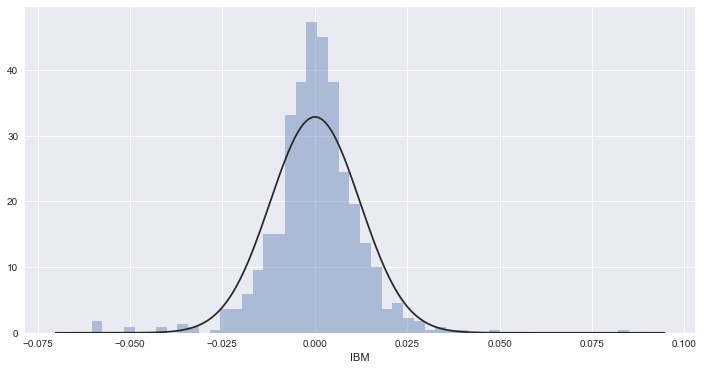

In [76]:
# %matplotlib notebook
%matplotlib inline
plt.figure(figsize=(12,6))
sns.distplot(df4['IBM'], bins=50, fit=stats.norm, kde=False);

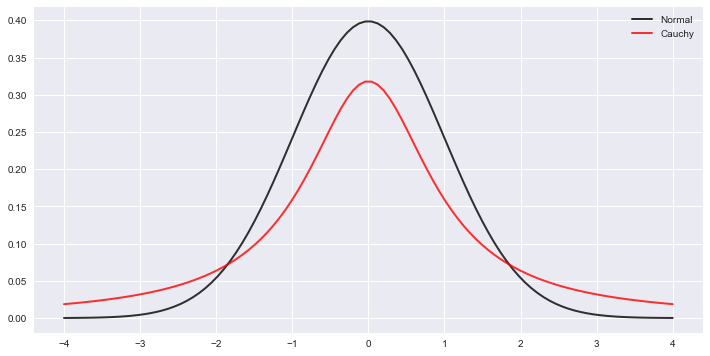

In [304]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
x = np.linspace(-4, 4, 100)
line1, = ax.plot(x, stats.norm.pdf(x), 'k-', lw=2, alpha=0.8, label='normal pdf')
line2, = ax.plot(x, stats.cauchy.pdf(x), 'r-', lw=2, alpha=0.8, label='cauchy pdf')
plt.legend([line1, line2], ["Normal", "Cauchy"]);

In [230]:
import math
import numpy as np
def std_norm_pdf(x):
    return 1 / np.sqrt(2 * math.pi) * np.exp(-x ** 2 / 2)

In [231]:
import math
import numpy as np
def norm_pdf(mu, sigma, x):
    return 1 / (sigma * np.sqrt(2 * math.pi)) * np.exp(- 1 / 2 * ((x - mu) / sigma) ** 2)

In [301]:
mu = [0, 0]
sigma = [1, 2]
alpha = 0.05
length = 100000

x = np.linspace(-4, 4, length)

samples_1 = np.random.normal(mu[0], sigma[0], length)
samples_2 = np.random.normal(mu[1], sigma[1], length)
ind = np.random.rand(length)
res = []
for k, v in enumerate(ind):
    if v >= alpha:
        res.append(samples_1[k])
    else:
        res.append(samples_2[k])
mm_mean = np.mean(res)
mm_std = np.std(res)

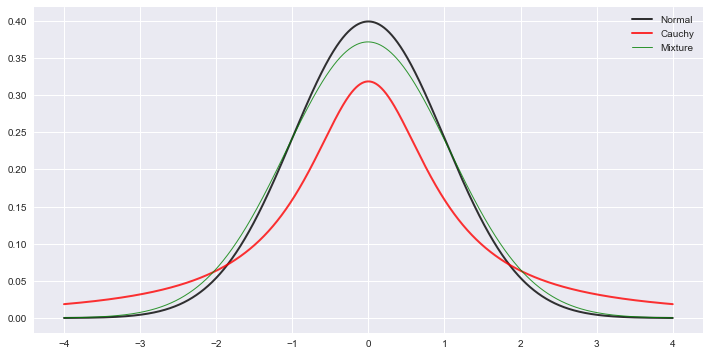

In [303]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
x = np.linspace(-4, 4, length)
y = norm_pdf(mm_mean, mm_std, x)

line1, = ax.plot(x, stats.norm.pdf(x), 'k-', lw=2, alpha=0.8, label='Nrmal')
line2, = ax.plot(x, stats.cauchy.pdf(x), 'r-', lw=2, alpha=0.8, label='Cauchy')
line3, = ax.plot(x, y, 'g-', lw=1, alpha=0.8, label='Mixture')
plt.legend([line1, line2, line3], ["Normal", "Cauchy", "Mixture"]);

***